In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("/content/german_credit_data.csv")

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df["Age"].describe()

,Age
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000


In [ ]:
df['Risk'].value_counts()

,count
Risk,
good,700
bad,300


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe(include="all")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [ ]:
df["Job"].unique()

array([2, 1, 3, 0])

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df.drop(columns='Unnamed: 0', inplace = True)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

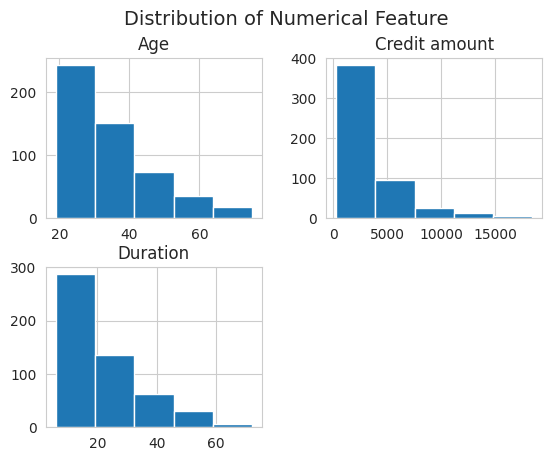

In [ ]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 5)
plt.suptitle("Distribution of Numerical Feature", fontsize = 14)
plt.show()

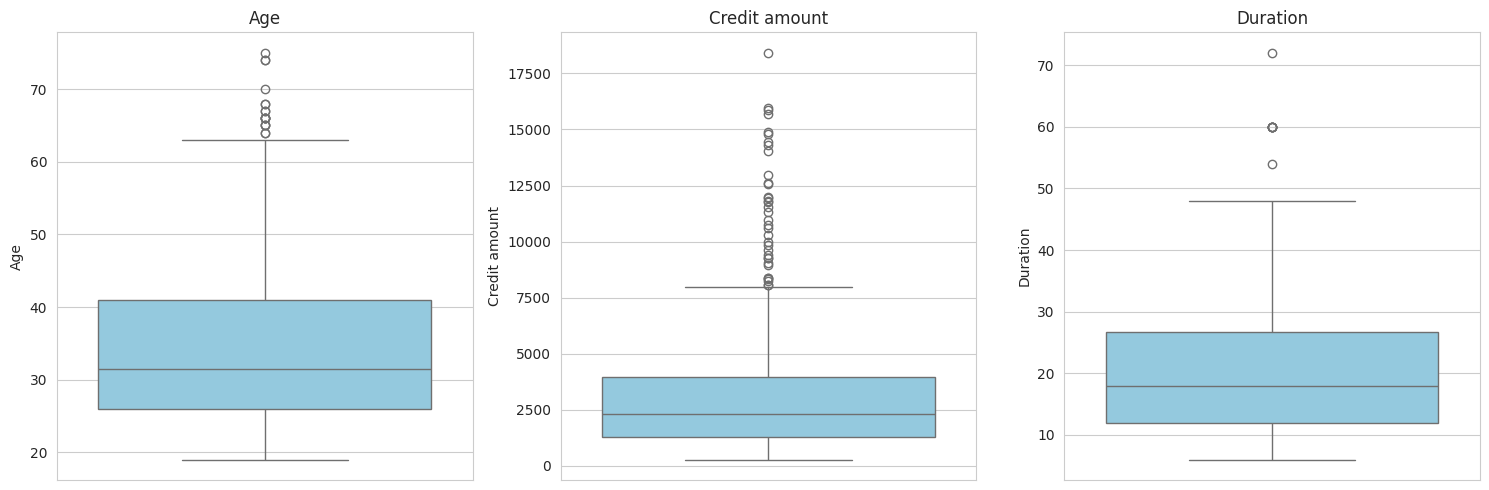

In [ ]:
plt.figure(figsize=(15,5))
for i , col in enumerate(["Age", "Credit amount", "Duration"]):
  plt.subplot(1,3, i + 1)
  sns.boxplot(y = df[col], color="Skyblue")
  plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [ ]:
categorical_cols = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

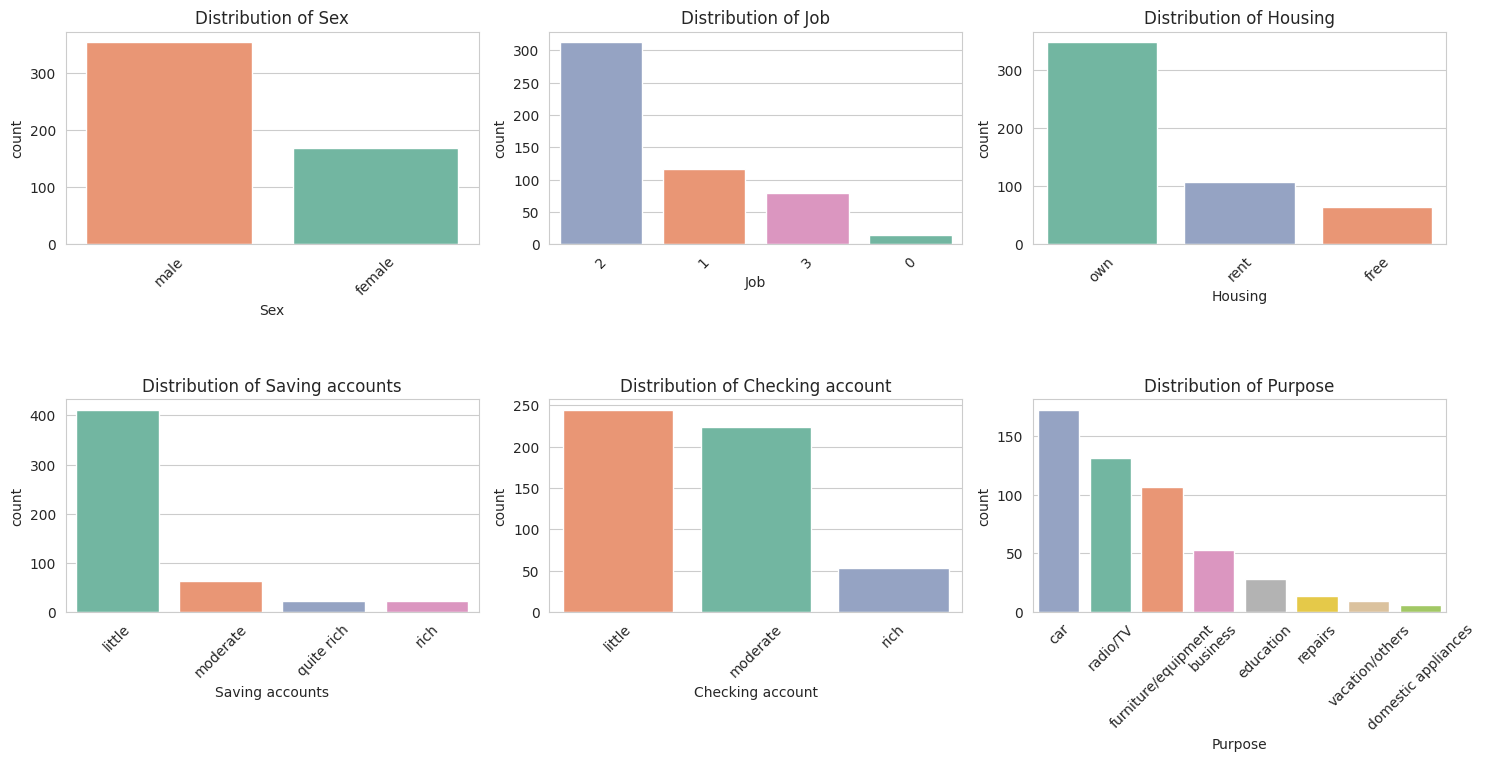

In [ ]:
plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        palette="Set2",
        order=df[col].value_counts().index,
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
corr = df[["Age","Job","Credit amount","Duration"]].corr()

In [ ]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


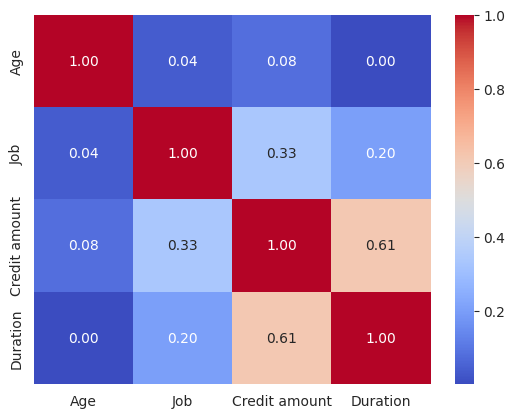

In [ ]:
sns.heatmap(corr, annot= True,cmap ="coolwarm",fmt=".2f")
plt.show()

In [ ]:
df.groupby("Job")["Credit amount"].mean()

,Credit amount
Job,
0,1767.857143
1,2250.715517
2,3129.130990
3,5648.784810


In [ ]:
df.groupby("Sex")["Credit amount"].mean()

,Credit amount
Sex,
female,2937.202381
male,3440.833333


In [ ]:
pd.pivot_table(df, values="Credit amount", index = "Housing", columns= "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


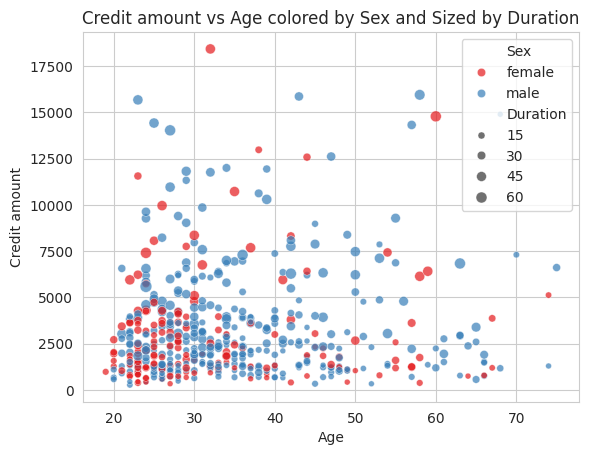

In [ ]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue = "Sex", size="Duration", alpha=0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex and Sized by Duration")
plt.show()

/tmp/ipython-input-3755388938.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x = "Saving accounts", y = "Credit amount", palette="Pastel1")


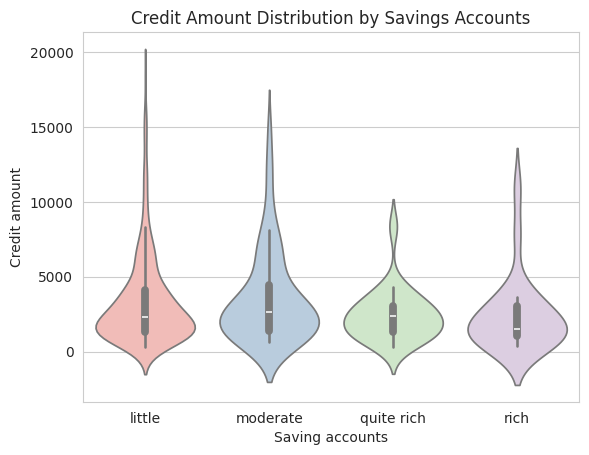

In [ ]:

sns.violinplot(data=df, x = "Saving accounts", y = "Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution by Savings Accounts")
plt.show()

In [ ]:
df["Risk"].value_counts(normalize=True) * 100

,proportion
Risk,
good,55.747126
bad,44.252874


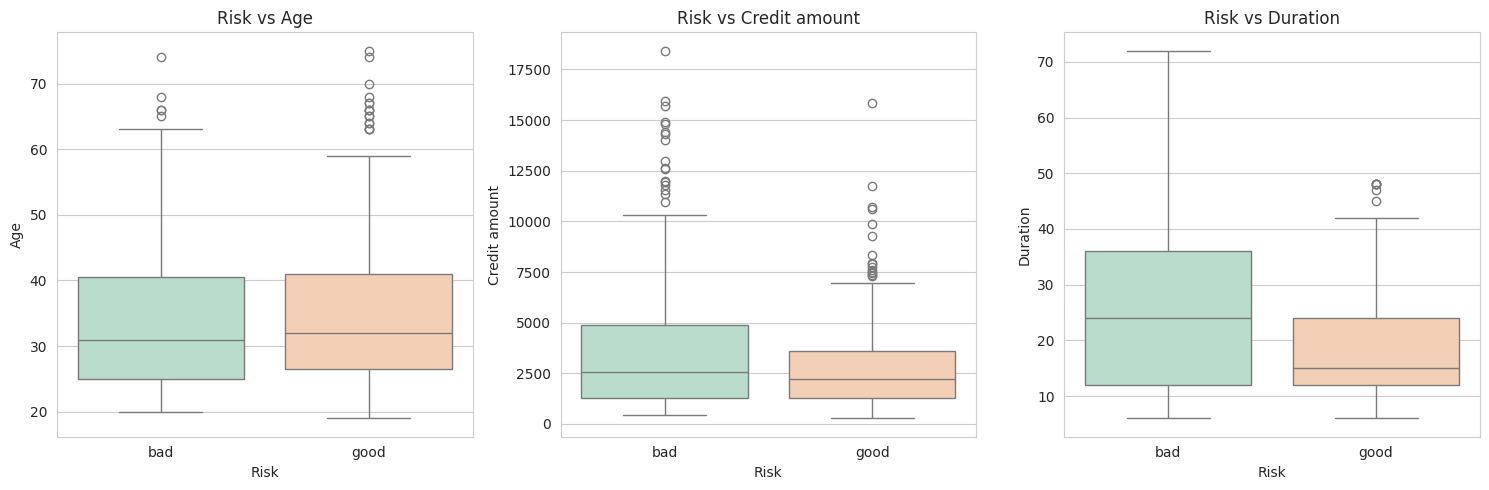

In [ ]:
plt.figure(figsize=(15,5))

for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        data=df,
        x="Risk",
        y=col,
        hue="Risk",
        palette="Pastel2",
        legend=False
    )
    plt.title(f"Risk vs {col}")

plt.tight_layout()
plt.show()


In [ ]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


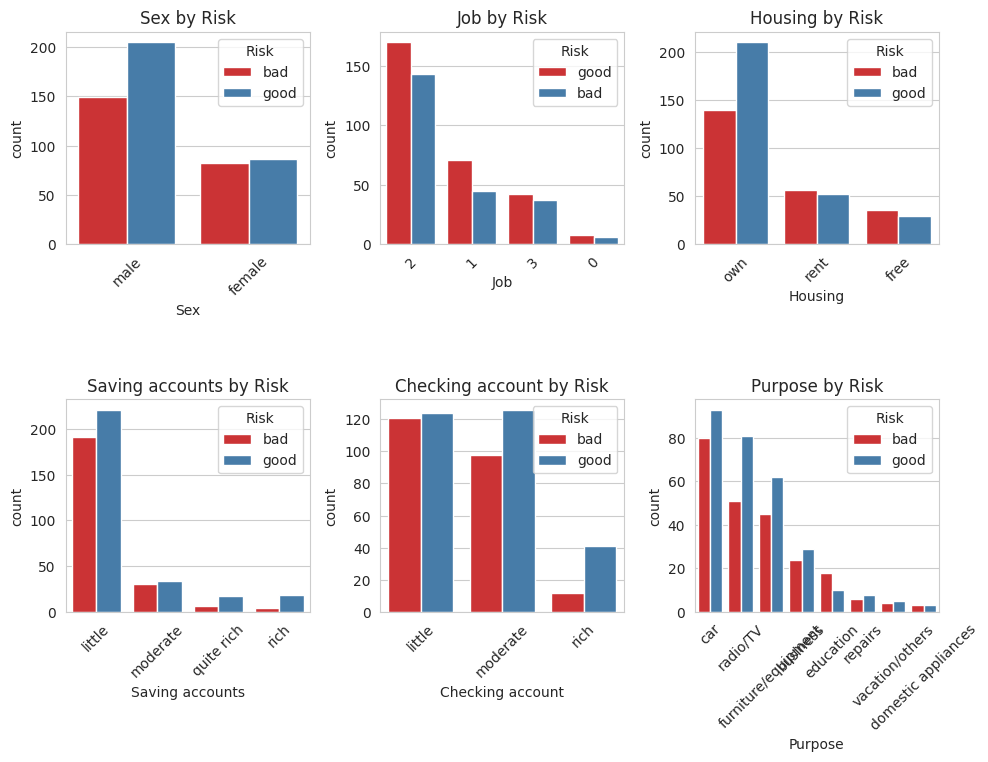

In [ ]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(3,3,i + 1)
  sns.countplot(data = df, x = col, hue = "Risk", palette="Set1", order=df[col].value_counts().index)
  plt.title(f"{col} by Risk")
  plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [ ]:
feature = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [ ]:
target = "Risk"

In [ ]:
df_model = df[feature + [target]].copy()

In [ ]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

In [ ]:
le_dict = {}

In [ ]:
cat_cols


Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [ ]:
for col in cat_cols:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  le_dict[col] = le
  joblib.dump(le, f"{col}_encoder.pkl")

In [ ]:
le_target = LabelEncoder()


In [ ]:
df_model[target]

,Risk
0,0
1,1
2,0
3,1
4,0
...,...
517,1
518,1
519,1
520,0


In [ ]:
df_model[target] = le_target.fit_transform(df_model[target])

In [133]:
df_model[target].value_counts()

,count
Risk,
1,291
0,231


In [134]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [135]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x = df_model.drop(target, axis = 1)

In [138]:
y = df_model[target]

In [139]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [140]:
y

,Risk
0,0
1,1
2,0
3,1
4,0
...,...
517,1
518,1
519,1
520,0


In [144]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=1
)


In [147]:
x_train.shape

(417, 8)

In [148]:
x_test.shape

(105, 8)

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def train_model(model, param_grid, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_


In [165]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10]
}

In [166]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, x_train, y_train, x_test, y_test)

In [167]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.6095238095238096


In [168]:
print("Best Parameters", params_dt)

Best Parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [169]:
rf = RandomForestClassifier(random_state = 1, class_weight="balanced", n_jobs= -1)

In [174]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [175]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, x_train, y_train, x_test, y_test)


In [177]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.6571428571428571


In [178]:
print("Best Parameters", best_rf)

Best Parameters RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       n_jobs=-1, random_state=1)


In [179]:
et = ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs= -1)

In [180]:
et_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [181]:
best_et, acc_et, param_et = train_model(et, et_param_grid,  x_train, y_train, x_test, y_test)

In [182]:
print("Extra trees accuracy", acc_et)

Extra trees accuracy 0.6285714285714286


In [185]:
print("Best Paramaters: ", param_et)

Best Paramaters:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [186]:
from scipy.special import eval_hermite
xgb = XGBClassifier(random_state = 1, scale_pos_weightc = (y_train ==0).sum() / (y_train ==1).sum(), use_label_encoder=False, eval_metric = "logloss")

In [188]:
xgb_param_grid = {
    "n_estimators" : [100,200],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01, 0.1, 0.2],
    "subsample" : [0.7, 1],
    "colsample_bytree" : [0.7,1]
}

In [189]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, x_train, y_train, x_test, y_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:45:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weightc", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [190]:
print("xgb accuracy", acc_xgb)


xgb accuracy 0.638095238095238


In [191]:
print("Best Paramaters", params_xgb)

Best Paramaters {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [192]:
best_et.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [196]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']

In [197]:
!pip install streamlit

In [200]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.192.175.139:8501

  Stopping...


In [201]:
!pip install streamlit pyngrok


In [204]:
!pip install streamlit pyngrok joblib pandas


In [206]:
ngrok.kill()

In [207]:
!streamlit run app.py &>/dev/null&

In [209]:


from pyngrok import ngrok
!ngrok config add-authtoken 35CfXFgVNyWE6WJYhGI7Casnl9R_CCTN44P8uTVwe3cN2HqA


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [210]:
!streamlit run app.py &>/dev/null&
public_url = ngrok.connect(addr="8501")
print("Access your app here:", public_url.public_url)


Access your app here: https://maryetta-polymorphonuclear-semimonarchically.ngrok-free.dev
